# Regresión logística múltiple Heart


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

[https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#heart
df = pd.read_csv('/content/drive/MyDrive/BUAP Ciencia Datos/Modulo4/Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.shape

(303, 14)

In [6]:
# isna
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
sns.pairplot(df, hue = 'target')

Output hidden; open in https://colab.research.google.com to view.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [16]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog = y_train, exog = X_train)
modelo_fit = modelo.fit()
print(modelo_fit.summary())

Optimization terminated successfully.
         Current function value: 0.324938
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           13
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.5273
Time:                        21:54:27   Log-Likelihood:                -78.635
converged:                       True   LL-Null:                       -166.34
Covariance Type:            nonrobust   LLR p-value:                 1.461e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5474      2.977      1.192      0.233      -2.287       9.382
age           -0.0180      0.

## Predicciones en el conjunto de entrenamiento

In [19]:
# Predicciones con intervalo de confianza
# ==============================================================================
predicciones = modelo_fit.predict(exog = X_train)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones < 0.5, 0, 1)
clasificacion

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [30]:
# Matriz de confusión de las predicciones de train
# ==============================================================================
cm = pd.crosstab(
    y_train.ravel(),
    clasificacion,
    rownames = ['Real'],
    colnames = ['Predicción']
)
cm

Predicción,0,1
Real,,
0,89,19
1,7,127


<Axes: xlabel='Predicción', ylabel='Real'>

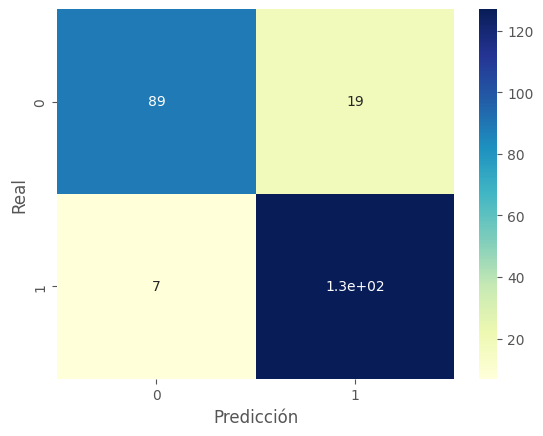

In [21]:
sns.heatmap(cm,cmap="YlGnBu",annot=True)

In [27]:
accuracy = accuracy_score(
    y_true = y_train,
    y_pred = clasificacion,
    normalize = True)
print("")
print(f"El accurancy de train es: {100 * accuracy}%")


El accurancy de train es: 89.25619834710744%


## Predicciones sobre el cojunto de prueba

Se calcula el porcentaje de aciertos que tiene el modelo al predecir las observaciones de test (accuracy).

In [28]:
X_test = sm.add_constant(X_test, prepend=True)
pred_test = modelo_fit.predict(exog = X_test)
pred_test = np.where(pred_test < 0.5, 0, 1)

In [29]:
# Accuracy de test del modelo
# ==============================================================================

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = pred_test,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 75.40983606557377%


### Matriz de confusión

In [35]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
cm2 = pd.crosstab(
    y_test.ravel(),
    pred_test,
    rownames = ['Real'],
    colnames = ['Predicción']
)
cm2

Predicción,0,1
Real,,
0,22,8
1,7,24


<Axes: xlabel='Predicción', ylabel='Real'>

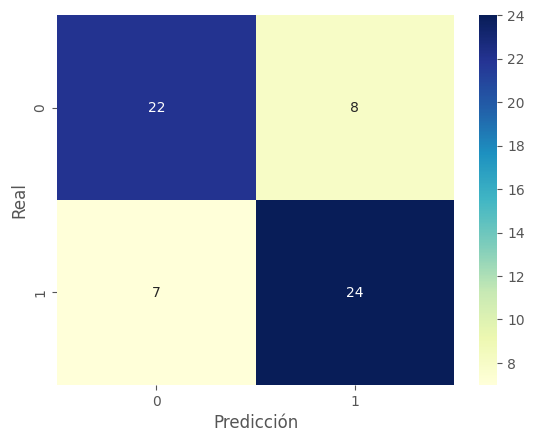

In [34]:
sns.heatmap(cm2,cmap="YlGnBu",annot=True)

In [36]:
## Metreicas de evaluación
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = pred_test,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
auc_roc = roc_auc_score(y_test, pred_test)

# Imprimir métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)


El accuracy de test es: 75.40983606557377%
Exactitud (Accuracy): 0.7540983606557377
Precisión (Precision): 0.75
Recall (Sensitivity): 0.7741935483870968
F1-score: 0.7619047619047619
AUC-ROC: 0.7537634408602152


## Ahora construye un modelo parsimonioso y evalua el desempeño con respecto al modelo original

In [37]:
# prompt: ## Ahora construye un modelo parsimonioso y evalua el desempeño con respecto al modelo original

import numpy as np
# Selecciona las variables significativas del modelo original (p-value < 0.05)
# Reemplaza 'cp', 'trestbps', 'chol', ... con las variables significativas reales de tu modelo
variables_significativas = ['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca']

# Crea el modelo parsimonioso usando solo las variables significativas
X_train_parsimonioso = X_train[variables_significativas]
X_test_parsimonioso = X_test[variables_significativas]

# Ajusta el modelo parsimonioso
modelo_parsimonioso = sm.Logit(endog=y_train, exog=X_train_parsimonioso)
modelo_parsimonioso_fit = modelo_parsimonioso.fit()
print(modelo_parsimonioso_fit.summary())

# Predicciones con el modelo parsimonioso
predicciones_parsimonioso_test = modelo_parsimonioso_fit.predict(exog = X_test_parsimonioso)
clasificacion_parsimonioso_test = np.where(predicciones_parsimonioso_test < 0.5, 0, 1)

# Calcula las métricas de evaluación para el modelo parsimonioso
accuracy_parsimonioso = accuracy_score(y_test, clasificacion_parsimonioso_test)
precision_parsimonioso = precision_score(y_test, clasificacion_parsimonioso_test)
recall_parsimonioso = recall_score(y_test, clasificacion_parsimonioso_test)
f1_parsimonioso = f1_score(y_test, clasificacion_parsimonioso_test)
auc_roc_parsimonioso = roc_auc_score(y_test, clasificacion_parsimonioso_test)

# Imprime las métricas del modelo parsimonioso
print("Métricas del modelo parsimonioso:")
print("Exactitud (Accuracy):", accuracy_parsimonioso)
print("Precisión (Precision):", precision_parsimonioso)
print("Recall (Sensitivity):", recall_parsimonioso)
print("F1-score:", f1_parsimonioso)
print("AUC-ROC:", auc_roc_parsimonioso)

# Compara las métricas del modelo original con el modelo parsimonioso
print("\nComparación de métricas:")
print("Métrica\t\tOriginal\tParsimonioso")
print(f"Accuracy\t\t{accuracy:.4f}\t\t{accuracy_parsimonioso:.4f}")
print(f"Precision\t\t{precision:.4f}\t\t{precision_parsimonioso:.4f}")
print(f"Recall\t\t{recall:.4f}\t\t{recall_parsimonioso:.4f}")
print(f"F1-score\t\t{f1:.4f}\t\t{f1_parsimonioso:.4f}")
print(f"AUC-ROC\t\t{auc_roc:.4f}\t\t{auc_roc_parsimonioso:.4f}")


Optimization terminated successfully.
         Current function value: 0.392316
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.4292
Time:                        22:16:16   Log-Likelihood:                -94.941
converged:                       True   LL-Null:                       -166.34
Covariance Type:            nonrobust   LLR p-value:                 2.566e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cp             0.9806      0.206      4.770      0.000       0.578       1.384
trestbps      -0.0185      0.